<a href="https://colab.research.google.com/github/mvdantas/Data-Science/blob/master/carteirasharpe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 7.6 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=02e5efbb8af7b1a15c17af5759f3ceab67d043754cb725dd857c71e01fddd796
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as wb
import yfinance as yf

In [ ]:
tickers = ['CSAN3.SA', 'VALE3.SA', 'LOGN3.SA', 'SBFG3.SA', 'RRRP3.SA', 'SEQL3.SA','PGMN3.SA']

In [ ]:
carteira = yf.download(tickers, '2016-08-28')['Adj Close']
carteira.head()

[*********************100%***********************]  7 of 7 completed


,CSAN3.SA,LOGN3.SA,PGMN3.SA,RRRP3.SA,SBFG3.SA,SEQL3.SA,VALE3.SA
Date,,,,,,,
2016-08-29,8.054404,3.942031,NaN,NaN,NaN,NaN,14.529390
2016-08-30,8.483532,3.811211,NaN,NaN,NaN,NaN,14.168159
2016-08-31,8.278872,3.802490,NaN,NaN,NaN,NaN,13.598224
2016-09-01,8.281072,4.011801,NaN,NaN,NaN,NaN,13.999589
2016-09-02,8.369099,3.880982,NaN,NaN,NaN,NaN,14.641772


In [ ]:
carteira.describe()

,CSAN3.SA,LOGN3.SA,PGMN3.SA,RRRP3.SA,SBFG3.SA,SEQL3.SA,VALE3.SA
count,1242.000000,1241.000000,243.000000,195.000000,587.000000,219.000000,1242.000000
mean,12.971574,9.930113,10.207901,38.135846,27.421482,23.228402,47.510728
std,5.325831,6.874506,1.512205,6.304814,8.261166,4.947389,24.691332
min,6.967356,2.130000,7.940000,20.799999,11.000000,12.300000,13.060396
25%,8.637328,3.165834,9.075000,35.330000,23.250000,20.445000,29.560081
50%,10.407489,8.320000,9.800000,38.849998,27.400000,24.000000,43.167242
75%,17.361049,16.020000,11.715000,42.000000,32.480001,27.045000,50.463523
max,27.200001,25.700001,13.650000,49.000000,50.930000,31.250000,117.300003


In [ ]:
carteira_retorno = carteira.pct_change()
carteira_retorno.head()

,CSAN3.SA,LOGN3.SA,PGMN3.SA,RRRP3.SA,SBFG3.SA,SEQL3.SA,VALE3.SA
Date,,,,,,,
2016-08-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-30,0.053279,-0.033186,NaN,NaN,NaN,NaN,-0.024862
2016-08-31,-0.024124,-0.002288,NaN,NaN,NaN,NaN,-0.040227
2016-09-01,0.000266,0.055046,NaN,NaN,NaN,NaN,0.029516
2016-09-02,0.010630,-0.032609,NaN,NaN,NaN,NaN,0.045872


In [ ]:
retorno_anual = carteira_retorno.mean()*252
retorno_anual.head()

CSAN3.SA    0.282370
LOGN3.SA    0.488018
PGMN3.SA    0.263457
RRRP3.SA    0.923863
SBFG3.SA    0.651001
dtype: float64

In [ ]:
cov_carteira = carteira_retorno.cov()*252
cov_carteira.head()

,CSAN3.SA,LOGN3.SA,PGMN3.SA,RRRP3.SA,SBFG3.SA,SEQL3.SA,VALE3.SA
CSAN3.SA,0.153561,0.087494,0.027917,0.037352,0.143152,0.010442,0.061539
LOGN3.SA,0.087494,0.416609,0.037279,0.053763,0.189058,0.025792,0.071722
PGMN3.SA,0.027917,0.037279,0.108628,0.008734,0.032724,0.016880,0.002218
RRRP3.SA,0.037352,0.053763,0.008734,0.228047,0.054983,0.037974,0.040001
SBFG3.SA,0.143152,0.189058,0.032724,0.054983,0.387356,0.030558,0.094885


In [ ]:
num_acoes = len(tickers)

In [ ]:
retorno_cart = []
peso_acoes = []
volatilidade_cart = []
sharpe_index = []

In [ ]:
#simulação de 10000 carteiras
for carteiras in range(10000):
#criando pesos randomicos
  peso = np.random.random(num_acoes)
  peso /= np.sum(peso)

In [ ]:
#calculo do retorno
retorno = np.dot(retorno_anual, peso)
retorno

0.502300514074421

In [ ]:
#calculo da volatilidade
volatilidade = np.sqrt(np.dot(peso.T, np.dot(cov_carteira, peso)))
volatilidade

0.306295871475458

In [ ]:
#calculo sharpe
sharpe = retorno / volatilidade
sharpe

1.6399193095708047

In [ ]:
# colocando as informações em listas
retorno_cart.append(retorno)
volatilidade_cart.append(volatilidade)
sharpe_index.append(sharpe)
peso_acoes.append(peso)

In [ ]:
# criando um novo data frame com as informações obtidas acima
dicionario = {'retorno' : retorno_cart, 'volatilidade': volatilidade_cart, 'sharpe' : sharpe_index}
for contar,ticker in enumerate(tickers):
    dicionario[ticker + 'peso'] = [peso[contar] for peso in peso_acoes]

carteira2 = pd.DataFrame(dicionario)
carteira2

,retorno,volatilidade,sharpe,CSAN3.SApeso,VALE3.SApeso,LOGN3.SApeso,SBFG3.SApeso,RRRP3.SApeso,SEQL3.SApeso,PGMN3.SApeso
0,0.502301,0.306296,1.639919,0.198741,0.198253,0.100378,0.106905,0.127998,0.05846,0.209265


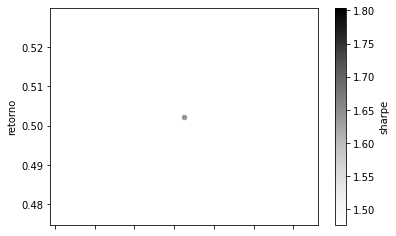

In [ ]:
carteira2.plot.scatter(x='volatilidade', y='retorno', c='sharpe')

In [ ]:
maior_sharpe = carteira2['sharpe'].max()
maior_sharpe

1.6399193095708047

In [ ]:
carteira_sharpe = carteira2.loc[carteira2['sharpe'] == maior_sharpe]
carteira_sharpe

,retorno,volatilidade,sharpe,CSAN3.SApeso,VALE3.SApeso,LOGN3.SApeso,SBFG3.SApeso,RRRP3.SApeso,SEQL3.SApeso,PGMN3.SApeso
0,0.502301,0.306296,1.639919,0.198741,0.198253,0.100378,0.106905,0.127998,0.05846,0.209265


In [ ]:
print(f'A carteira com maior sharpe é {carteira_sharpe.T}')

A carteira com maior sharpe é                      0
retorno       0.502301
volatilidade  0.306296
sharpe        1.639919
CSAN3.SApeso  0.198741
VALE3.SApeso  0.198253
LOGN3.SApeso  0.100378
SBFG3.SApeso  0.106905
RRRP3.SApeso  0.127998
SEQL3.SApeso  0.058460
PGMN3.SApeso  0.209265


In [ ]:
np.random.seed(42)
num_ports = 6000
all_weights = np.zeros((num_ports, len(carteira_retorno.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(7))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum( (carteira_retorno.mean() * weights * 252))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(carteira_retorno.cov()*252, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]